In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sns


In [2]:
dataFrame = pd.read_csv('space_decay.csv')

In [3]:
dataFrame

CCSDS_OMM_VERS                            COMMENT        CREATION_DATE  \
0                   2  GENERATED VIA SPACE-TRACK.ORG API  2021-11-01T06:46:11   
1                   2  GENERATED VIA SPACE-TRACK.ORG API  2021-11-01T04:58:37   
2                   2  GENERATED VIA SPACE-TRACK.ORG API  2021-11-01T06:26:11   
3                   2  GENERATED VIA SPACE-TRACK.ORG API  2021-10-31T18:07:15   
4                   2  GENERATED VIA SPACE-TRACK.ORG API  2021-11-01T04:58:37   
...               ...                                ...                  ...   
14367               2  GENERATED VIA SPACE-TRACK.ORG API  2021-10-29T18:22:04   
14368               2  GENERATED VIA SPACE-TRACK.ORG API  2021-10-31T18:06:35   
14369               2  GENERATED VIA SPACE-TRACK.ORG API  2021-10-31T18:07:15   
14370               2  GENERATED VIA SPACE-TRACK.ORG API  2021-10-31T18:07:15   
14371               2  GENERATED VIA SPACE-TRACK.ORG API  2021-11-01T04:58:37   

      ORIGINATOR           OBJECT_NAME   OBJECT_ID CENTER_NAME REF_FRAME  \
0        18 SPCS       ARIANE 42P+ DEB   1992-072J       EARTH      TEME   
1        18 SPCS              SL-8 DEB   1979-028C       EARTH      TEME   
2        18 SPCS                GSAT 1   2001-015A       EARTH      TEME   
3        18 SPCS              CZ-4 DEB  1999-057MB       EARTH      TEME   
4        18 SPCS              CZ-4 DEB  1999-057MC       EARTH      TEME   
...          ...                   ...         ...         ...       ...   
14367    18 SPCS  TBA - TO BE ASSIGNED         NaN       EARTH      TEME   
14368    18 SPCS  TBA - TO BE ASSIGNED         NaN       EARTH      TEME   
14369    18 SPCS  TBA - TO BE ASSIGNED         NaN       EARTH      TEME   
14370    18 SPCS  TBA - TO BE ASSIGNED         NaN       EARTH      TEME   
14371    18 SPCS  TBA - TO BE ASSIGNED         NaN       EARTH      TEME   

      TIME_SYSTEM MEAN_ELEMENT_THEORY  ... RCS_SIZE  COUNTRY_CODE  \
0             UTC                SGP4  ...   MEDIUM            FR   
1             UTC                SGP4  ...    SMALL           CIS   
2             UTC                SGP4  ...    LARGE           IND   
3             UTC                SGP4  ...    SMALL           PRC   
4             UTC                SGP4  ...    SMALL           PRC   
...           ...                 ...  ...      ...           ...   
14367         UTC                SGP4  ...      NaN           NaN   
14368         UTC                SGP4  ...      NaN           NaN   
14369         UTC                SGP4  ...      NaN           NaN   
14370         UTC                SGP4  ...      NaN           NaN   
14371         UTC                SGP4  ...      NaN           NaN   

       LAUNCH_DATE   SITE  DECAY_DATE     FILE      GP_ID  \
0           1992.0  FRGUI         NaN  3195178  188614016   
1           1979.0  PKMTR         NaN  3194950  188593285   
2           2001.0    SRI         NaN  3195026  188609573   
3           1999.0    TSC         NaN  3194431  188556894   
4           1999.0    TSC         NaN  3194950  188592541   
...            ...    ...         ...      ...        ...   
14367          NaN    NaN         NaN  3191411  188414015   
14368          NaN    NaN         NaN  3194430  188550573   
14369          NaN    NaN         NaN  3194431  188561362   
14370          NaN    NaN         NaN  3194431  188561387   
14371          NaN    NaN         NaN  3194950  188596191   

                    TLE_LINE0  \
0           0 ARIANE 42P+ DEB   
1                  0 SL-8 DEB   
2                    0 GSAT 1   
3                  0 CZ-4 DEB   
4                  0 CZ-4 DEB   
...                       ...   
14367  0 TBA - TO BE ASSIGNED   
14368  0 TBA - TO BE ASSIGNED   
14369  0 TBA - TO BE ASSIGNED   
14370  0 TBA - TO BE ASSIGNED   
14371  0 TBA - TO BE ASSIGNED   

                                               TLE_LINE1  \
0      1 26741U 92072J   21304.94919376  .00000883  0...   
1      1 26743U 79028C   21304.68908982  .

In [4]:
dataFrame.describe()

CCSDS_OMM_VERS   MEAN_MOTION  ECCENTRICITY   INCLINATION  \
count         14372.0  14372.000000  14372.000000  14372.000000   
mean              2.0     12.463847      0.067168     74.354208   
std               0.0      4.509305      0.181547     29.626780   
min               2.0      0.051783      0.000005      0.001400   
25%               2.0     13.452144      0.000725     53.055300   
50%               2.0     14.277052      0.003416     86.369200   
75%               2.0     14.963745      0.013505     98.565125   
max               2.0     16.404097      0.897218    144.586200   

       RA_OF_ASC_NODE  ARG_OF_PERICENTER  MEAN_ANOMALY  EPHEMERIS_TYPE  \
count    14372.000000       14372.000000  14372.000000         14372.0   
mean       182.353111         165.977199    191.015595             0.0   
std        116.717713         104.461866    109.873807             0.0   
min          0.020000           0.008200      0.004800             0.0   
25%         71.987350          77.363475     90.001600             0.0   
50%        189.460250         150.483900    206.957400             0.0   
75%        292.484750         258.328550    284.163200             0.0   
max        359.967900         359.989900    359.981900             0.0   

        NORAD_CAT_ID  ELEMENT_SET_NO  ...  MEAN_MOTION_DOT  MEAN_MOTION_DDOT  \
count   14372.000000         14372.0  ...     14372.000000      1.437200e+04   
mean    39558.160381           999.0  ...         0.000049      2.307751e-07   
std      7619.846133             0.0  ...         0.002391      1.485939e-05   
min     26741.000000           999.0  ...        -0.014873     -4.210300e-05   
25%     33965.750000           999.0  ...         0.000001      0.000000e+00   
50%     40165.500000           999.0  ...         0.000010      0.000000e+00   
75%     45173.500000           999.0  ...         0.000032      0.000000e+00   
max    270288.000000           999.0  ...         0.225321      1.654800e-03   

       SEMIMAJOR_AXIS        PERIOD       APOAPSIS      PERIAPSIS  \
count    14372.000000  14372.000000   14372.000000   14372.000000   
mean     10636.185210    223.521557    5721.060178    2795.040245   
std       9580.627227    446.517041   13016.299008    7943.045264   
min       6542.850000     87.783000     183.393000      73.279000   
25%       6956.246750     96.232750     599.876000     546.115000   
50%       7177.549000    100.861000     843.686000     702.433500   
75%       7468.055000    107.046000    1207.919500     831.959750   
max     304049.635000  27808.429000  372136.402000  224547.015000   

        LAUNCH_DATE  DECAY_DATE          FILE         GP_ID  
count  14333.000000         0.0  1.437200e+04  1.437200e+04  
mean    2004.507570         NaN  3.194186e+06  1.885638e+08  
std       13.565227         NaN  3.119117e+03  1.393616e+05  
min     1961.000000         NaN  3.142499e+06  1.860926e+08  
25%     1997.000000         NaN  3.194431e+06  1.885665e+08  
50%     2002.000000         NaN  3.194950e+06  1.885986e+08  
75%     2018.000000         NaN  3.195064e+06  1.886107e+08  
max     2021.000000         NaN  3.195727e+06  1.886250e+08  

[8 rows x 22 columns]

In [5]:
dataFrame.columns

Index(['CCSDS_OMM_VERS', 'COMMENT', 'CREATION_DATE', 'ORIGINATOR',
       'OBJECT_NAME', 'OBJECT_ID', 'CENTER_NAME', 'REF_FRAME', 'TIME_SYSTEM',
       'MEAN_ELEMENT_THEORY', 'EPOCH', 'MEAN_MOTION', 'ECCENTRICITY',
       'INCLINATION', 'RA_OF_ASC_NODE', 'ARG_OF_PERICENTER', 'MEAN_ANOMALY',
       'EPHEMERIS_TYPE', 'CLASSIFICATION_TYPE', 'NORAD_CAT_ID',
       'ELEMENT_SET_NO', 'REV_AT_EPOCH', 'BSTAR', 'MEAN_MOTION_DOT',
       'MEAN_MOTION_DDOT', 'SEMIMAJOR_AXIS', 'PERIOD', 'APOAPSIS', 'PERIAPSIS',
       'OBJECT_TYPE', 'RCS_SIZE', 'COUNTRY_CODE', 'LAUNCH_DATE', 'SITE',
       'DECAY_DATE', 'FILE', 'GP_ID', 'TLE_LINE0', 'TLE_LINE1', 'TLE_LINE2'],
      dtype='object')

In [6]:
for item in dataFrame.columns:
    print(item)
    print(dataFrame[item].describe())

CCSDS_OMM_VERS
count    14372.0
mean         2.0
std          0.0
min          2.0
25%          2.0
50%          2.0
75%          2.0
max          2.0
Name: CCSDS_OMM_VERS, dtype: float64
COMMENT
count                                 14372
unique                                    1
top       GENERATED VIA SPACE-TRACK.ORG API
freq                                  14372
Name: COMMENT, dtype: object
CREATION_DATE
count                   14372
unique                    191
top       2021-11-01T04:58:37
freq                     4847
Name: CREATION_DATE, dtype: object
ORIGINATOR
count       14372
unique          1
top       18 SPCS
freq        14372
Name: ORIGINATOR, dtype: object
OBJECT_NAME
count              14372
unique              5372
top       FENGYUN 1C DEB
freq                2669
Name: OBJECT_NAME, dtype: object
OBJECT_ID
count         14333
unique        14333
top       1992-072J
freq              1
Name: OBJECT_ID, dtype: object
CENTER_NAME
count     14372
unique        1
top  

In [7]:
dataFrame["OBJECT_TYPE"].describe()

count      14372
unique         4
top       DEBRIS
freq        8431
Name: OBJECT_TYPE, dtype: object

In [8]:
# dataFrame["OBJECT_TYPE"] = dataFrame["OBJECT_TYPE"].apply(lambda x: 1 if x == "DEBRIS" else 0)

In [9]:
# dataFrame["OBJECT_TYPE"]

In [10]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14372 entries, 0 to 14371
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CCSDS_OMM_VERS       14372 non-null  int64  
 1   COMMENT              14372 non-null  object 
 2   CREATION_DATE        14372 non-null  object 
 3   ORIGINATOR           14372 non-null  object 
 4   OBJECT_NAME          14372 non-null  object 
 5   OBJECT_ID            14333 non-null  object 
 6   CENTER_NAME          14372 non-null  object 
 7   REF_FRAME            14372 non-null  object 
 8   TIME_SYSTEM          14372 non-null  object 
 9   MEAN_ELEMENT_THEORY  14372 non-null  object 
 10  EPOCH                14372 non-null  object 
 11  MEAN_MOTION          14372 non-null  float64
 12  ECCENTRICITY         14372 non-null  float64
 13  INCLINATION          14372 non-null  float64
 14  RA_OF_ASC_NODE       14372 non-null  float64
 15  ARG_OF_PERICENTER    14372 non-null 

In [11]:
dataFrame = dataFrame.drop_duplicates(subset=['OBJECT_ID'])

In [12]:
object_columns = list(dataFrame.select_dtypes(include=["object"]).columns)

In [13]:
object_columns

['COMMENT',
 'CREATION_DATE',
 'ORIGINATOR',
 'OBJECT_NAME',
 'OBJECT_ID',
 'CENTER_NAME',
 'REF_FRAME',
 'TIME_SYSTEM',
 'MEAN_ELEMENT_THEORY',
 'EPOCH',
 'CLASSIFICATION_TYPE',
 'OBJECT_TYPE',
 'RCS_SIZE',
 'COUNTRY_CODE',
 'SITE',
 'TLE_LINE0',
 'TLE_LINE1',
 'TLE_LINE2']

In [14]:
dataFrame["MEAN_MOTION_DDOT"].describe()

count    1.433400e+04
mean     2.313869e-07
std      1.487907e-05
min     -4.210300e-05
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.654800e-03
Name: MEAN_MOTION_DDOT, dtype: float64

In [15]:
dataFrame["MEAN_MOTION_DOT"].describe()

count    14334.000000
mean         0.000049
std          0.002394
min         -0.014873
25%          0.000001
50%          0.000010
75%          0.000032
max          0.225321
Name: MEAN_MOTION_DOT, dtype: float64

In [16]:
dataFrame = dataFrame.drop(columns=["CCSDS_OMM_VERS" , "COMMENT" , "CREATION_DATE" , "ORIGINATOR" , "OBJECT_NAME" , "OBJECT_ID" , "REF_FRAME" , "TIME_SYSTEM" , "CENTER_NAME" ,"MEAN_ELEMENT_THEORY" , "COUNTRY_CODE" , "EPOCH" , "EPHEMERIS_TYPE" , "CLASSIFICATION_TYPE" , "RCS_SIZE" , "COUNTRY_CODE" , "SITE" , "TLE_LINE0" , "TLE_LINE1" , "TLE_LINE2"])

In [17]:
dataFrame = dataFrame.drop(columns=["BSTAR" , "MEAN_MOTION_DOT" , "MEAN_MOTION_DDOT" ,"DECAY_DATE" , "FILE" , "GP_ID" , "ELEMENT_SET_NO"])

In [18]:
dataFrame

MEAN_MOTION  ECCENTRICITY  INCLINATION  RA_OF_ASC_NODE  \
0         2.921700      0.652893       7.7156         90.2410   
1        13.754973      0.003072      82.9193        299.1120   
2         1.038224      0.023739      12.1717         16.5368   
3        14.775907      0.006062      98.4781          8.7205   
4        14.724482      0.006226      98.4232        122.0724   
...            ...           ...          ...             ...   
14329     1.726826      0.504225      11.6205        188.7505   
14330     1.648809      0.453078      10.8285        227.9659   
14331     1.610644      0.483557      10.7227        225.4025   
14332    15.488596      0.000379      51.6457         28.5788   
14333    14.072310      0.027466      97.6269        299.8786   

       ARG_OF_PERICENTER  MEAN_ANOMALY  NORAD_CAT_ID  REV_AT_EPOCH  \
0               243.1216       38.7796         26741         23588   
1               158.9093      201.3337         26743         50124   
2               250.1248      146.2900         26745          7798   
3                37.3771      323.1632         26754         10204   
4               345.1605       27.6061         26755          9622   
...                  ...           ...           ...           ...   
14329            18.9358      354.6612         49375           119   
14330           324.3414      277.0792         49376           104   
14331           321.7872       12.3257         49378            99   
14332           158.6589       26.9938         49379         30972   
14333           122.7192      240.0780         81122         36176   

       SEMIMAJOR_AXIS    PERIOD   APOAPSIS  PERIAPSIS OBJECT_TYPE  LAUNCH_DATE  
0           20668.618   492.864  27784.871    796.095      DEBRIS       1992.0  
1            7358.038   104.689   1002.507    957.299      DEBRIS       1979.0  
2           41197.852  1386.984  35797.696  33841.738     PAYLOAD       2001.0  
3            7015.076    97.456    679.465    594.417      DEBRIS       1999.0  
4            7031.400    97.796    697.039    609.491      DEBRIS       1999.0  
...               ...       ...        ...        ...         ...          ...  
14329       29347.392   833.900  37766.952   8171.563      DEBRIS       2018.0  
14330       30265.997   873.358  37600.719  10175.005      DEBRIS       2018.0  
14331       30742.242   894.053  39229.718   9498.496      DEBRIS       2018.0  
14332        6798.198    92.972    422.640    417.486     PAYLOAD       2021.0  
14333        7247.000   102.329   1067.908    669.822         TBA          NaN  

[14334 rows x 14 columns]

In [19]:
mask = dataFrame["OBJECT_TYPE"] == "TBA"

# Drop the rows that match the mask
dataFrame = dataFrame.drop(index=dataFrame[mask].index)

In [20]:
dataFrame

MEAN_MOTION  ECCENTRICITY  INCLINATION  RA_OF_ASC_NODE  \
0         2.921700      0.652893       7.7156         90.2410   
1        13.754973      0.003072      82.9193        299.1120   
2         1.038224      0.023739      12.1717         16.5368   
3        14.775907      0.006062      98.4781          8.7205   
4        14.724482      0.006226      98.4232        122.0724   
...            ...           ...          ...             ...   
14328     1.947986      0.486499      11.1000        190.7386   
14329     1.726826      0.504225      11.6205        188.7505   
14330     1.648809      0.453078      10.8285        227.9659   
14331     1.610644      0.483557      10.7227        225.4025   
14332    15.488596      0.000379      51.6457         28.5788   

       ARG_OF_PERICENTER  MEAN_ANOMALY  NORAD_CAT_ID  REV_AT_EPOCH  \
0               243.1216       38.7796         26741         23588   
1               158.9093      201.3337         26743         50124   
2               250.1248      146.2900         26745          7798   
3                37.3771      323.1632         26754         10204   
4               345.1605       27.6061         26755          9622   
...                  ...           ...           ...           ...   
14328            42.3158      346.4724         49373           135   
14329            18.9358      354.6612         49375           119   
14330           324.3414      277.0792         49376           104   
14331           321.7872       12.3257         49378            99   
14332           158.6589       26.9938         49379         30972   

       SEMIMAJOR_AXIS    PERIOD   APOAPSIS  PERIAPSIS OBJECT_TYPE  LAUNCH_DATE  
0           20668.618   492.864  27784.871    796.095      DEBRIS       1992.0  
1            7358.038   104.689   1002.507    957.299      DEBRIS       1979.0  
2           41197.852  1386.984  35797.696  33841.738     PAYLOAD       2001.0  
3            7015.076    97.456    679.465    594.417      DEBRIS       1999.0  
4            7031.400    97.796    697.039    609.491      DEBRIS       1999.0  
...               ...       ...        ...        ...         ...          ...  
14328       27081.827   739.225  33878.971   7528.413      DEBRIS       2018.0  
14329       29347.392   833.900  37766.952   8171.563      DEBRIS       2018.0  
14330       30265.997   873.358  37600.719  10175.005      DEBRIS       2018.0  
14331       30742.242   894.053  39229.718   9498.496      DEBRIS       2018.0  
14332        6798.198    92.972    422.640    417.486     PAYLOAD       2021.0  

[14125 rows x 14 columns]

In [21]:
dataFrame["OBJECT_TYPE"].unique()

array(['DEBRIS', 'PAYLOAD', 'ROCKET BODY'], dtype=object)

In [22]:
dataFrame.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14125 entries, 0 to 14332
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEAN_MOTION        14125 non-null  float64
 1   ECCENTRICITY       14125 non-null  float64
 2   INCLINATION        14125 non-null  float64
 3   RA_OF_ASC_NODE     14125 non-null  float64
 4   ARG_OF_PERICENTER  14125 non-null  float64
 5   MEAN_ANOMALY       14125 non-null  float64
 6   NORAD_CAT_ID       14125 non-null  int64  
 7   REV_AT_EPOCH       14125 non-null  int64  
 8   SEMIMAJOR_AXIS     14125 non-null  float64
 9   PERIOD             14125 non-null  float64
 10  APOAPSIS           14125 non-null  float64
 11  PERIAPSIS          14125 non-null  float64
 12  OBJECT_TYPE        14125 non-null  object 
 13  LAUNCH_DATE        14125 non-null  float64
dtypes: float64(11), int64(2), object(1)
memory usage: 1.6+ MB


In [23]:
debrisCount = dataFrame["OBJECT_TYPE"].value_counts()["DEBRIS"]

In [24]:
payloadCount = dataFrame["OBJECT_TYPE"].value_counts()["PAYLOAD"]

In [25]:
rocketBodyCount = dataFrame["OBJECT_TYPE"].value_counts()["ROCKET BODY"]

In [26]:
print("Debris = " , debrisCount)
print("Not debris = " , payloadCount + rocketBodyCount)

print("Total = " , debrisCount+payloadCount+rocketBodyCount)

Debris =  8431
Not debris =  5694
Total =  14125


In [27]:
dataFrame["OBJECT_TYPE"] = dataFrame["OBJECT_TYPE"].apply(lambda x: 1 if x == "DEBRIS" else 0)

In [28]:
debrisTrue = dataFrame["OBJECT_TYPE"].value_counts()[1]

In [29]:
debrisFalse = dataFrame["OBJECT_TYPE"].value_counts()[0]

In [30]:
print("Debris = " , debrisTrue)

print("Not debris = " , debrisFalse)

Debris =  8431
Not debris =  5694


In [31]:
debrisFalse == payloadCount + rocketBodyCount

True

In [32]:
debrisTrue == debrisCount

True

In [33]:
dataFrame

MEAN_MOTION  ECCENTRICITY  INCLINATION  RA_OF_ASC_NODE  \
0         2.921700      0.652893       7.7156         90.2410   
1        13.754973      0.003072      82.9193        299.1120   
2         1.038224      0.023739      12.1717         16.5368   
3        14.775907      0.006062      98.4781          8.7205   
4        14.724482      0.006226      98.4232        122.0724   
...            ...           ...          ...             ...   
14328     1.947986      0.486499      11.1000        190.7386   
14329     1.726826      0.504225      11.6205        188.7505   
14330     1.648809      0.453078      10.8285        227.9659   
14331     1.610644      0.483557      10.7227        225.4025   
14332    15.488596      0.000379      51.6457         28.5788   

       ARG_OF_PERICENTER  MEAN_ANOMALY  NORAD_CAT_ID  REV_AT_EPOCH  \
0               243.1216       38.7796         26741         23588   
1               158.9093      201.3337         26743         50124   
2               250.1248      146.2900         26745          7798   
3                37.3771      323.1632         26754         10204   
4               345.1605       27.6061         26755          9622   
...                  ...           ...           ...           ...   
14328            42.3158      346.4724         49373           135   
14329            18.9358      354.6612         49375           119   
14330           324.3414      277.0792         49376           104   
14331           321.7872       12.3257         49378            99   
14332           158.6589       26.9938         49379         30972   

       SEMIMAJOR_AXIS    PERIOD   APOAPSIS  PERIAPSIS  OBJECT_TYPE  \
0           20668.618   492.864  27784.871    796.095            1   
1            7358.038   104.689   1002.507    957.299            1   
2           41197.852  1386.984  35797.696  33841.738            0   
3            7015.076    97.456    679.465    594.417            1   
4            7031.400    97.796    697.039    609.491            1   
...               ...       ...        ...        ...          ...   
14328       27081.827   739.225  33878.971   7528.413            1   
14329       29347.392   833.900  37766.952   8171.563            1   
14330       30265.997   873.358  37600.719  10175.005            1   
14331       30742.242   894.053  39229.718   9498.496            1   
14332        6798.198    92.972    422.640    417.486            0   

       LAUNCH_DATE  
0           1992.0  
1           1979.0  
2           2001.0  
3           1999.0  
4           1999.0  
...            ...  
14328       2018.0  
14329       2018.0  
14330       2018.0  
14331       2018.0  
14332       2021.0  

[14125 rows x 14 columns]

In [34]:
columns = dataFrame.columns

for item in columns:
    print(item)

MEAN_MOTION
ECCENTRICITY
INCLINATION
RA_OF_ASC_NODE
ARG_OF_PERICENTER
MEAN_ANOMALY
NORAD_CAT_ID
REV_AT_EPOCH
SEMIMAJOR_AXIS
PERIOD
APOAPSIS
PERIAPSIS
OBJECT_TYPE
LAUNCH_DATE


In [35]:
for item in columns:
    print(item)
    print(dataFrame[item].describe())
    

MEAN_MOTION
count    14125.000000
mean        12.423639
std          4.534790
min          0.051783
25%         13.442620
50%         14.267312
75%         14.928988
max         16.404097
Name: MEAN_MOTION, dtype: float64
ECCENTRICITY
count    14125.000000
mean         0.068144
std          0.182790
min          0.000005
25%          0.000699
50%          0.003525
75%          0.013719
max          0.897218
Name: ECCENTRICITY, dtype: float64
INCLINATION
count    14125.000000
mean        74.128021
std         29.727391
min          0.001400
25%         53.055200
50%         86.346000
75%         98.582000
max        144.586200
Name: INCLINATION, dtype: float64
RA_OF_ASC_NODE
count    14125.000000
mean       183.373056
std        116.527726
min          0.020000
25%         72.456400
50%        190.919200
75%        293.735100
max        359.967900
Name: RA_OF_ASC_NODE, dtype: float64
ARG_OF_PERICENTER
count    14125.000000
mean       165.756693
std        104.495273
min          0.00820

In [36]:
X = dataFrame.drop(columns=["OBJECT_TYPE" , "LAUNCH_DATE"])
y = dataFrame["OBJECT_TYPE"]

selector = SelectKBest(chi2, k=7).fit(X, y)

selected_indices = selector.get_support(indices=True)

print(selected_indices)

selected_features = X.columns[selected_indices]

print(selected_features)

[ 4  6  7  8  9 10 11]
Index(['ARG_OF_PERICENTER', 'NORAD_CAT_ID', 'REV_AT_EPOCH', 'SEMIMAJOR_AXIS',
       'PERIOD', 'APOAPSIS', 'PERIAPSIS'],
      dtype='object')


In [37]:
dataFrame[selected_features]

ARG_OF_PERICENTER  NORAD_CAT_ID  REV_AT_EPOCH  SEMIMAJOR_AXIS  \
0               243.1216         26741         23588       20668.618   
1               158.9093         26743         50124        7358.038   
2               250.1248         26745          7798       41197.852   
3                37.3771         26754         10204        7015.076   
4               345.1605         26755          9622        7031.400   
...                  ...           ...           ...             ...   
14328            42.3158         49373           135       27081.827   
14329            18.9358         49375           119       29347.392   
14330           324.3414         49376           104       30265.997   
14331           321.7872         49378            99       30742.242   
14332           158.6589         49379         30972        6798.198   

         PERIOD   APOAPSIS  PERIAPSIS  
0       492.864  27784.871    796.095  
1       104.689   1002.507    957.299  
2      1386.984  35797.696  33841.738  
3        97.456    679.465    594.417  
4        97.796    697.039    609.491  
...         ...        ...        ...  
14328   739.225  33878.971   7528.413  
14329   833.900  37766.952   8171.563  
14330   873.358  37600.719  10175.005  
14331   894.053  39229.718   9498.496  
14332    92.972    422.640    417.486  

[14125 rows x 7 columns]

In [38]:
dataFrame["OBJECT_TYPE"]

0        1
1        1
2        0
3        1
4        1
        ..
14328    1
14329    1
14330    1
14331    1
14332    0
Name: OBJECT_TYPE, Length: 14125, dtype: int64

In [39]:
dataFrame.columns

Index(['MEAN_MOTION', 'ECCENTRICITY', 'INCLINATION', 'RA_OF_ASC_NODE',
       'ARG_OF_PERICENTER', 'MEAN_ANOMALY', 'NORAD_CAT_ID', 'REV_AT_EPOCH',
       'SEMIMAJOR_AXIS', 'PERIOD', 'APOAPSIS', 'PERIAPSIS', 'OBJECT_TYPE',
       'LAUNCH_DATE'],
      dtype='object')

# With feature selection


In [40]:
x= dataFrame.iloc[:, [ 4 , 6 , 7 , 8 , 9 , 10 , 11]].values  
y= dataFrame.iloc[:, 12].values

# Without feature selection

In [41]:
# x= dataFrame.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11]].values  
# y= dataFrame.iloc[:, 12].values

In [42]:
print(x)

print(x.size)

print(x.shape)

[[  243.1216 26741.     23588.     ...   492.864  27784.871    796.095 ]
 [  158.9093 26743.     50124.     ...   104.689   1002.507    957.299 ]
 [  250.1248 26745.      7798.     ...  1386.984  35797.696  33841.738 ]
 ...
 [  324.3414 49376.       104.     ...   873.358  37600.719  10175.005 ]
 [  321.7872 49378.        99.     ...   894.053  39229.718   9498.496 ]
 [  158.6589 49379.     30972.     ...    92.972    422.64     417.486 ]]
98875
(14125, 7)


In [43]:
print(y)

print(y.shape)

print(y.size)

[1 1 0 ... 1 1 0]
(14125,)
14125


In [44]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.20, random_state=0)  

In [45]:
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

In [46]:
x_train

array([[-1.52754072,  0.08346599,  0.16222914, ..., -0.27485018,
        -0.38941548, -0.27896197],
       [ 1.60704015,  0.41676759, -0.25310879, ..., -0.2809562 ,
        -0.40128014, -0.29393744],
       [ 1.56917926, -1.44534715,  1.4970463 , ..., -0.26495524,
        -0.37339359, -0.25013527],
       ...,
       [ 1.50010691,  0.69693192, -0.61364493, ..., -0.27666685,
        -0.39352044, -0.28243928],
       [-1.3351152 ,  0.92981178, -0.8868134 , ..., -0.24931593,
        -0.34736283, -0.2074401 ],
       [ 1.47656613, -1.14608421,  0.24192808, ..., -0.25433069,
        -0.33830255, -0.24963419]])

In [47]:
x_test

array([[-0.86664986,  0.87498028, -0.81754956, ..., -0.27800622,
        -0.3964472 , -0.28518085],
       [ 0.44234265, -1.20245593,  0.30390836, ..., -0.26086564,
        -0.35831195, -0.25242109],
       [ 1.49616639, -0.11137066, -1.05051838, ...,  2.54060987,
         2.2352344 ,  4.05469823],
       ...,
       [ 0.67266349,  0.78179753, -0.71855619, ..., -0.278227  ,
        -0.39661445, -0.28614817],
       [-0.77409505,  0.94598399, -0.85435254, ..., -0.27800622,
        -0.39645243, -0.28517211],
       [-0.49357255, -0.79630236,  1.19694968, ..., -0.27366641,
        -0.38724581, -0.27588622]])

In [63]:
model = LogisticRegression(C=1.623, class_weight=None, dual=False, fit_intercept=True,  
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,  
                   multi_class='multinomial', n_jobs=None, penalty='l2',  
                   random_state=0, solver='newton-cg', tol=0.0001, verbose=True,  
                   warm_start=False)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy*100)

Accuracy: 80.42477876106194


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


In [49]:
# sns.regplot(x=x, y=y, data=dataFrame, logistic=True, ci=None)

# Confusion Matrix for logistic regression

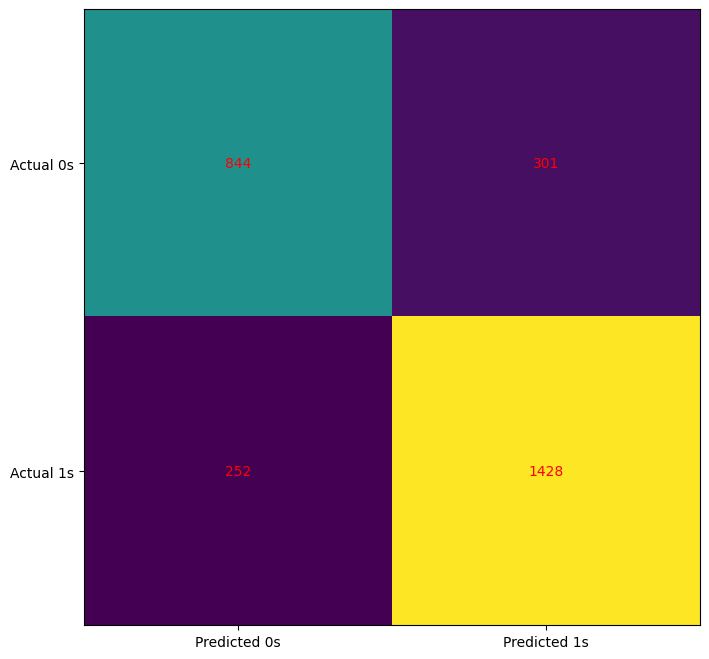

In [50]:
cm = confusion_matrix(y_test, model.predict(x_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

- From the above Confusion Matrix we infer total accurate predictions are 844 + 1428 = 2272

- The number of wrong predictions are 252 + 301 = 553

- Accuracy is (2272 / (2272 + 553)) * 100 = 80.42

# Confusion Matrix for Random Forest

In [51]:
clf = RandomForestClassifier(n_estimators = 1000, random_state=42 , max_features="sqrt" , max_leaf_nodes = 1000)

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print()

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred)*100)


ACCURACY OF THE MODEL:  94.86725663716814


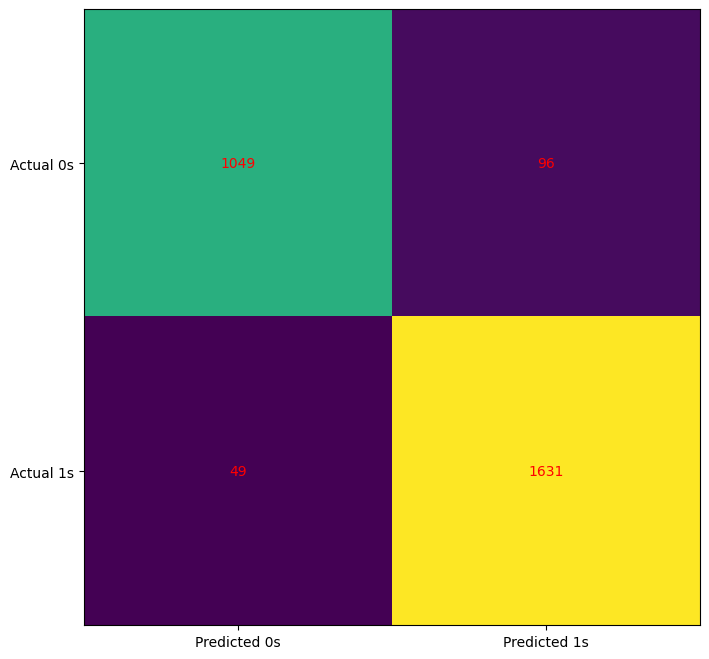

In [52]:
cm = confusion_matrix(y_test, clf.predict(x_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

- From the above Confusion Matrix we infer total accurate predictions are 1631 + 1049 = 2680

- The number of wrong predictions are 96 + 49 = 145

- Accuracy is (2680 / (2680 + 145)) * 100 = 94.86

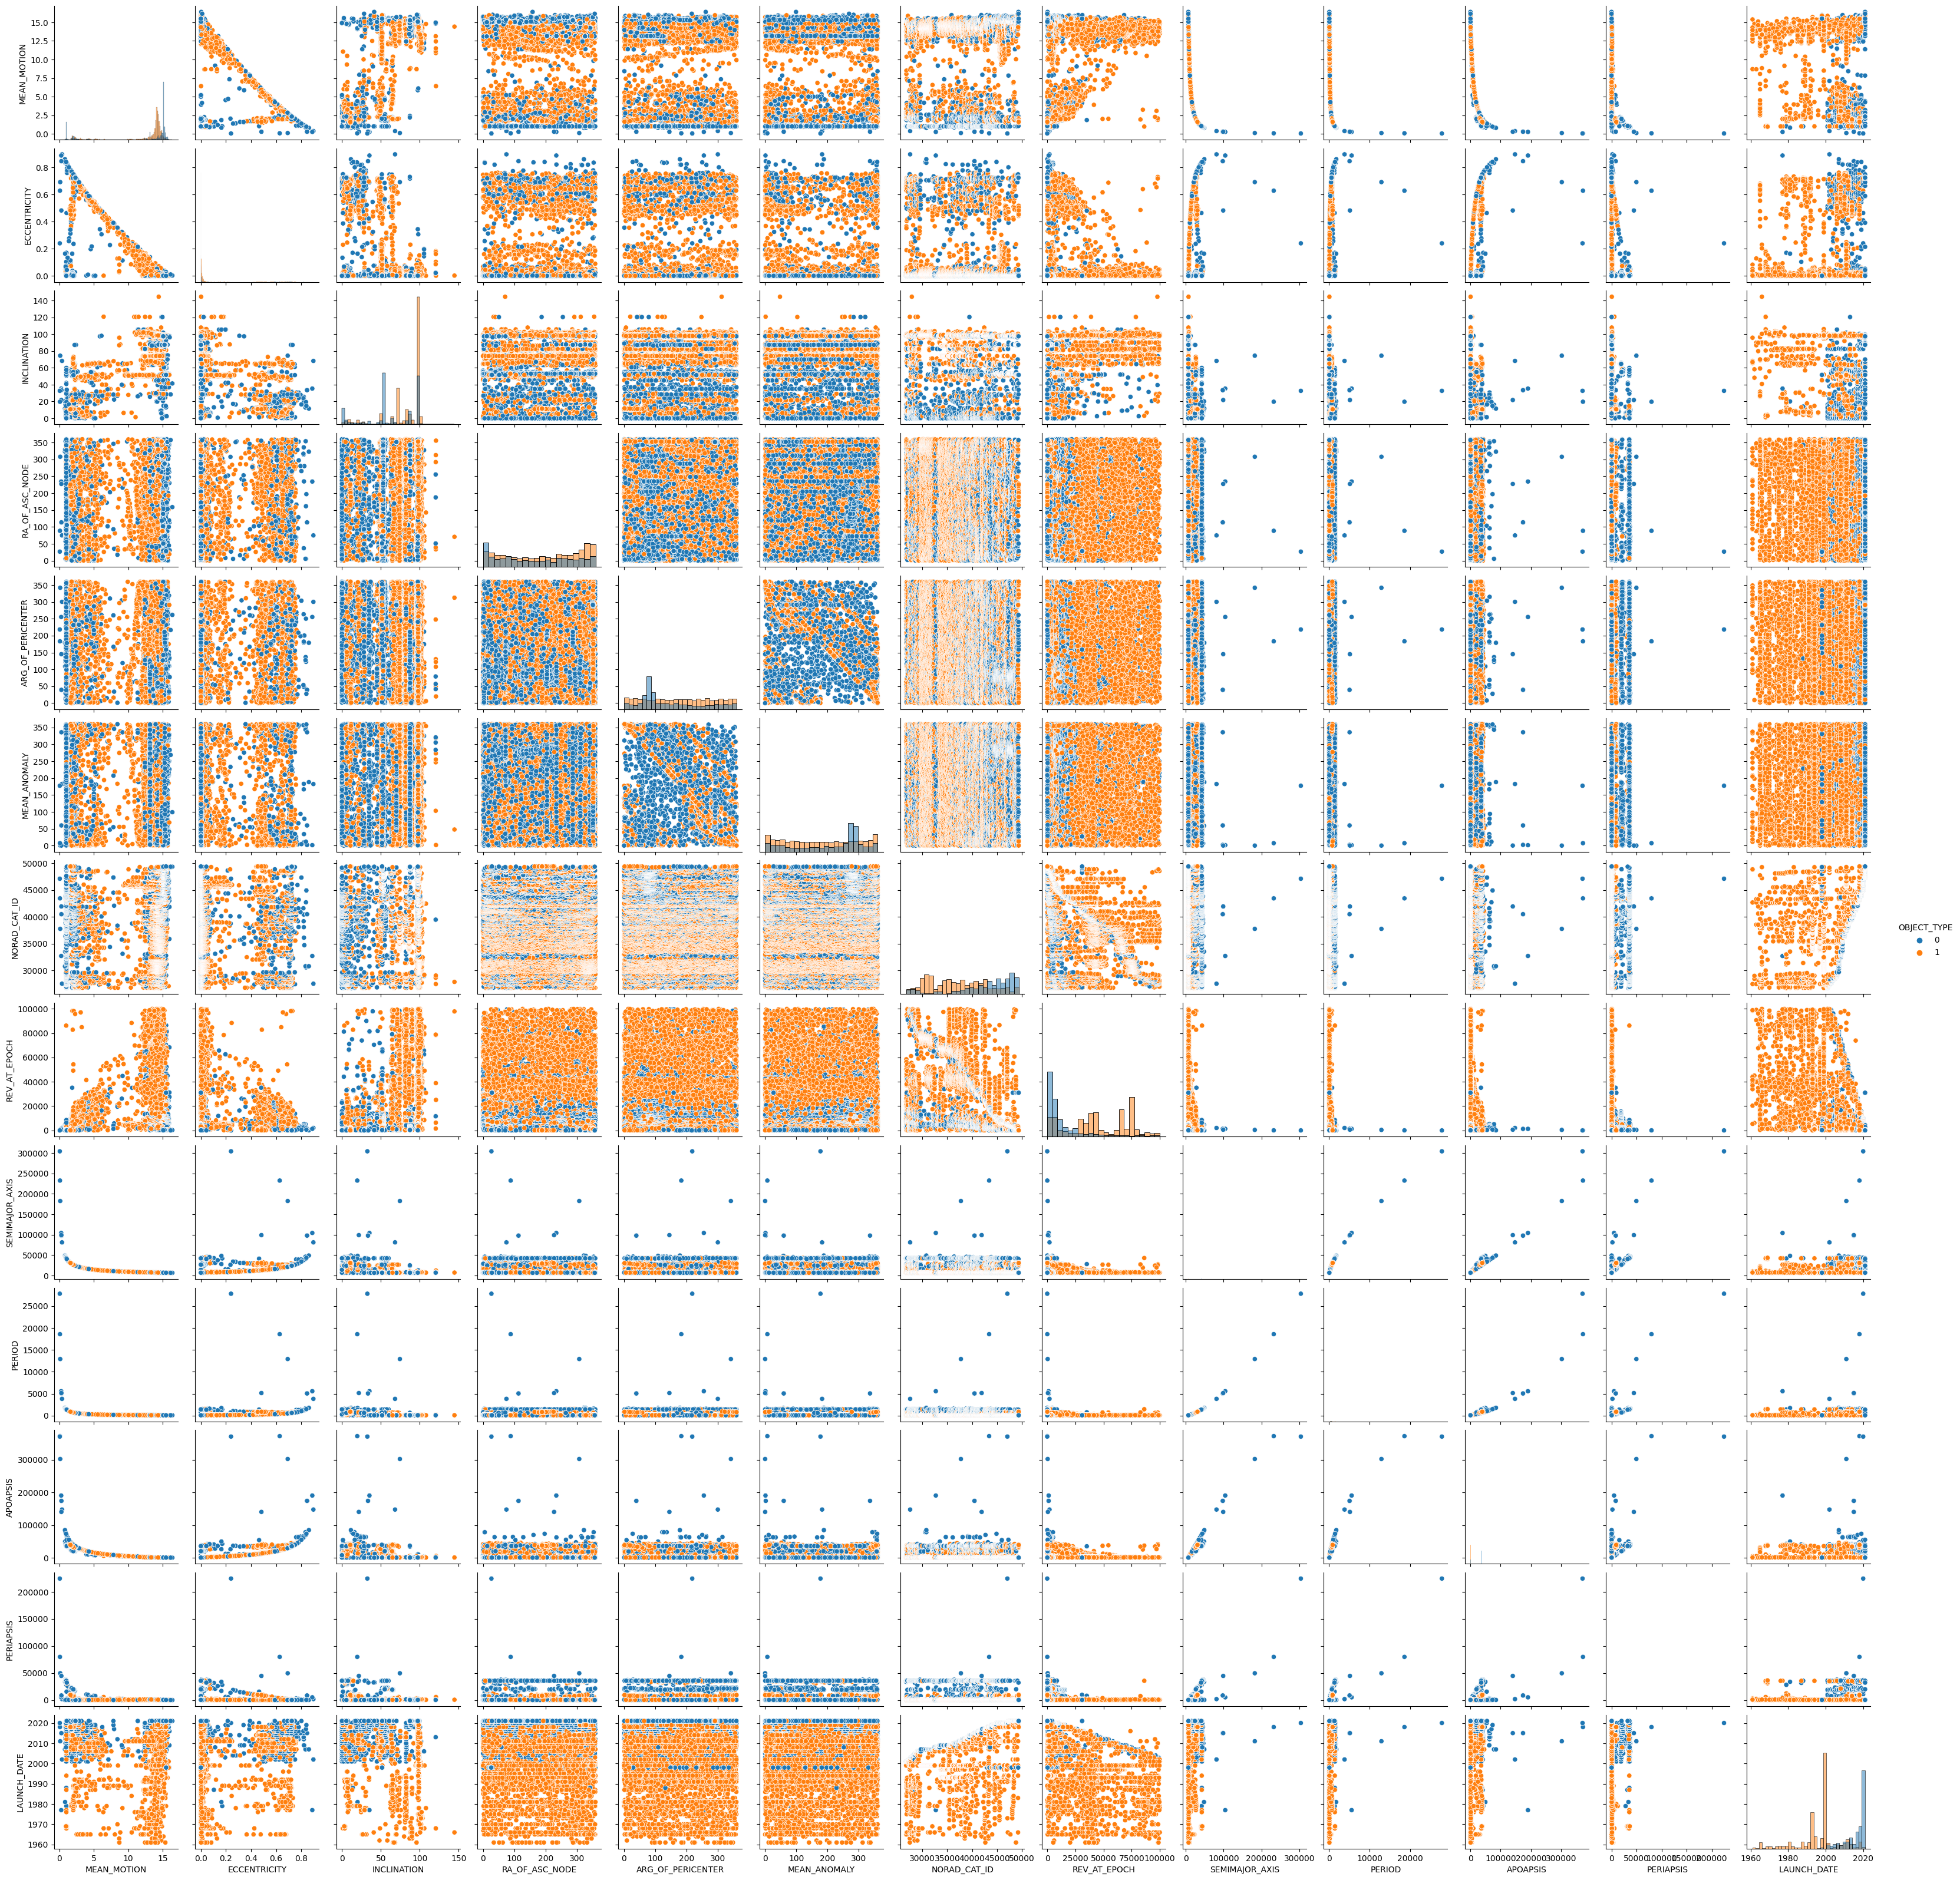

In [71]:
sns.pairplot(data=dataFrame, hue="OBJECT_TYPE" , diag_kind="hist")

plt.show()

# Finding the best combination of hyperparameter's using GridSearchCV for logistic regression

In [54]:
logModel = LogisticRegression()

param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

# Finding the best combination of hyperparameter's using GridSearchCV for logistic regression (Alternative approach)

In [59]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.967667 using {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.960333 (0.020572) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.960333 (0.020246) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.962333 (0.020114) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.961333 (0.020450) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.963333 (0.020385) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.962667 (0.019989) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.961667 (0.020180) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.962000 (0.020396) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.963667 (0.019232) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.963000 (0.019858) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.963000 (0.019858) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.964333 (0.018918) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.967667 (0.017829) wi

# Best combinations of hyper parameters are 

Best: 0.956667 using {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}

In [60]:
clf = RandomForestClassifier(n_estimators = 1000, random_state=42 , max_features="sqrt" , max_leaf_nodes = 1000)

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print()

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred)*100)


ACCURACY OF THE MODEL:  94.86725663716814


In [61]:
first = [	243.1216	,26741,	23588,	20668.618	,492.864	,27784.871,	796.095]
second = [	158.9093	,26743,	50124,	7358.038	,104.689	,1002.507	,957.299]
third = [	250.1248	,26745,	7798	,41197.852,	1386.984	,35797.696,	33841.738]
tests = [first , second , third]

# Testing Logistic regression

In [64]:
for item in tests:
    testing = np.array(item)
    testing = testing.reshape(1, 7)

    print(testing)

    output = model.predict(testing)

    print(output)

[[  243.1216 26741.     23588.     20668.618    492.864  27784.871
    796.095 ]]
[1]
[[  158.9093 26743.     50124.      7358.038    104.689   1002.507
    957.299 ]]
[1]
[[  250.1248 26745.      7798.     41197.852   1386.984  35797.696
  33841.738 ]]
[1]


# Testing Random Forest

In [65]:
for item in tests:
    testing = np.array(item)
    testing = testing.reshape(1, 7)

    print(testing)

    output = clf.predict(testing)

    print(output)

[[  243.1216 26741.     23588.     20668.618    492.864  27784.871
    796.095 ]]
[0]
[[  158.9093 26743.     50124.      7358.038    104.689   1002.507
    957.299 ]]
[0]
[[  250.1248 26745.      7798.     41197.852   1386.984  35797.696
  33841.738 ]]
[0]


# RandomForestRegressor using RandomizedSearchCV

In [66]:
# from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor(random_state = 42)
# from pprint import pprint
# print('Parameters currently in use:\n')
# pprint(rf.get_params())

In [67]:
# from sklearn.model_selection import RandomizedSearchCV
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# max_features = ['auto', 'sqrt']
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# min_samples_split = [2, 5, 10]
# min_samples_leaf = [1, 2, 4]
# bootstrap = [True, False]
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# pprint(random_grid)

In [68]:
# rf = RandomForestRegressor()
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# rf_random.fit(x_train, y_train)

In [69]:
# def evaluate(model, test_features, test_labels):
#     predictions = model.predict(test_features)
#     errors = abs(predictions - test_labels)
#     mape = 100 * np.mean(errors / test_labels)
#     accuracy = 100 - mape
#     print('Model Performance')
#     print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
#     print('Accuracy = {:0.2f}%.'.format(accuracy))
    
#     return accuracy

In [70]:
# base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
# base_model.fit(x_train, y_train)
# base_accuracy = evaluate(base_model, x_train, y_train)

# best_random = rf_random.best_estimator_
# random_accuracy = evaluate(best_random, x_train, y_train)

# print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))
